In [1]:
import torch
from urllib.request import urlopen
from PIL import Image
from open_clip import create_model_from_pretrained, get_tokenizer

# Load the model and config files from the Hugging Face Hub
model, preprocess = create_model_from_pretrained('hf-hub:microsoft/BiomedCLIP-PubMedBERT_256-vit_base_patch16_224')
tokenizer = get_tokenizer('hf-hub:microsoft/BiomedCLIP-PubMedBERT_256-vit_base_patch16_224')


# Zero-shot image classification
template = 'this is a photo of '
labels = [
    'adenocarcinoma histopathology',
    'brain MRI',
    'covid line chart',
    'squamous cell carcinoma histopathology',
    'immunohistochemistry histopathology',
    'bone X-ray',
    'chest X-ray',
    'pie chart',
    'hematoxylin and eosin histopathology'
]

dataset_url = 'https://huggingface.co/microsoft/BiomedCLIP-PubMedBERT_256-vit_base_patch16_224/resolve/main/example_data/biomed_image_classification_example_data/'
test_imgs = [
    'squamous_cell_carcinoma_histopathology.jpeg',
    'H_and_E_histopathology.jpg',
    'bone_X-ray.jpg',
    'adenocarcinoma_histopathology.jpg',
    'covid_line_chart.png',
    'IHC_histopathology.jpg',
    'chest_X-ray.jpg',
    'brain_MRI.jpg',
    'pie_chart.png'
]
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
model.to(device)
model.eval()

context_length = 256

images = torch.stack([preprocess(Image.open(urlopen(dataset_url + img))) for img in test_imgs]).to(device)
texts = tokenizer([template + l for l in labels], context_length=context_length).to(device)
with torch.no_grad():
    image_features, text_features, logit_scale = model(images, texts)

    logits = (logit_scale * image_features @ text_features.t()).detach().softmax(dim=-1)
    sorted_indices = torch.argsort(logits, dim=-1, descending=True)

    logits = logits.cpu().numpy()
    sorted_indices = sorted_indices.cpu().numpy()

top_k = -1

for i, img in enumerate(test_imgs):
    pred = labels[sorted_indices[i][0]]

    top_k = len(labels) if top_k == -1 else top_k
    print(img.split('/')[-1] + ':')
    for j in range(top_k):
        jth_index = sorted_indices[i][j]
        print(f'{labels[jth_index]}: {logits[i][jth_index]}')
    print('\n')


c:\Users\ajani\miniconda3\envs\biomedclip\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\ajani\miniconda3\envs\biomedclip\lib\site-packages\transformers\utils\generic.py:441: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  _torch_pytree._register_pytree_node(
c:\Users\ajani\miniconda3\envs\biomedclip\lib\site-packages\transformers\utils\generic.py:309: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  _torch_pytree._register_pytree_node(
c:\Users\ajani\miniconda3\envs\biomedclip\lib\site-packages\timm\models\layers\__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  wa

squamous_cell_carcinoma_histopathology.jpeg:
squamous cell carcinoma histopathology: 0.9974347949028015
adenocarcinoma histopathology: 0.0013077944749966264
hematoxylin and eosin histopathology: 0.0012207155814394355
immunohistochemistry histopathology: 3.67573848052416e-05
chest X-ray: 1.1562262432207593e-11
brain MRI: 5.135295400721107e-12
pie chart: 2.5097029489329348e-12
covid line chart: 8.321106390735133e-13
bone X-ray: 2.35915226834112e-14


H_and_E_histopathology.jpg:
hematoxylin and eosin histopathology: 0.9871522784233093
immunohistochemistry histopathology: 0.012632673606276512
adenocarcinoma histopathology: 0.00014957085659261793
squamous cell carcinoma histopathology: 5.2327453886391595e-05
brain MRI: 1.0331556040910073e-05
chest X-ray: 1.793886781342735e-06
bone X-ray: 6.824089382462262e-07
pie chart: 2.457040295666957e-07
covid line chart: 4.083672636157054e-11


bone_X-ray.jpg:
bone X-ray: 0.9994789958000183
pie chart: 0.00044867669930681586
brain MRI: 4.294378231861628

381-aruna.jpg:


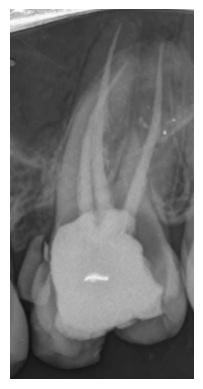

dental X-ray showing root canal treated tooth: 0.8512192964553833
treated tooth with overfilled root canal: 0.06715559214353561
root canal treated tooth: 0.042764924466609955
treated tooth with underfilled root canal: 0.03825417906045914
treated tooth with separated instrument: 0.00060599873540923


560-24-kalani.jpg:


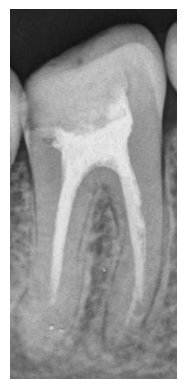

treated tooth with overfilled root canal: 0.4835849702358246
dental X-ray showing root canal treated tooth: 0.336193323135376
treated tooth with underfilled root canal: 0.152850940823555
root canal treated tooth: 0.027015941217541695
treated tooth with separated instrument: 0.0003549062239471823


573-priyanka.jpg:


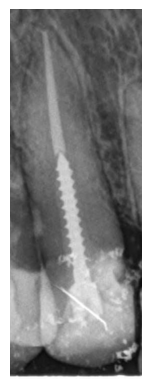

treated tooth with overfilled root canal: 0.501143217086792
treated tooth with underfilled root canal: 0.2744865417480469
dental X-ray showing root canal treated tooth: 0.13954146206378937
root canal treated tooth: 0.08330462872982025
treated tooth with separated instrument: 0.0015241835499182343




In [9]:
import torch
from urllib.request import urlopen
from PIL import Image
from open_clip import create_model_from_pretrained, get_tokenizer
import matplotlib.pyplot as plt

# Load BiomedCLIP model
model_name = 'hf-hub:microsoft/BiomedCLIP-PubMedBERT_256-vit_base_patch16_224'
model, preprocess = create_model_from_pretrained(model_name)
tokenizer = get_tokenizer(model_name)

# Define dental-specific labels
template = 'this is a photo of '
labels = [
    'root canal treated tooth',
    'dental X-ray showing root canal treated tooth',
    'treated tooth with overfilled root canal',
    'treated tooth with underfilled root canal',
    'treated tooth with separated instrument'
]

# test images from local directory
images = [
    '381-aruna.jpg',
    '560-24-kalani.jpg',
    '573-priyanka.jpg'
]

# Set device
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
model.to(device)
model.eval()

context_length = 256

# Load and preprocess images
images = torch.stack([preprocess(Image.open(img)) for img in images]).to(device)
texts = tokenizer([template + l for l in labels], context_length=context_length).to(device)

# Run inference
with torch.no_grad():
    image_features, text_features, logit_scale = model(images, texts)
    logits = (logit_scale * image_features @ text_features.t()).detach().softmax(dim=-1)
    sorted_indices = torch.argsort(logits, dim=-1, descending=True)

    logits = logits.cpu().numpy()
    sorted_indices = sorted_indices.cpu().numpy()

# Display predictions
top_k = -1
# Use the original list of image paths to get the file names
image_paths = ['381-aruna.jpg', '560-24-kalani.jpg', '573-priyanka.jpg']  # Replace this with your actual list of image paths

for i, img_path in enumerate(image_paths):
    pred = labels[sorted_indices[i][0]]
    top_k = len(labels) if top_k == -1 else top_k
    print(img_path.split('/')[-1] + ':')
    # plot the image
    img = Image.open(img_path)
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    for j in range(top_k):
        jth_index = sorted_indices[i][j]
        print(f'{labels[jth_index]}: {logits[i][jth_index]}')
    print('\n')


c:\Users\ajani\miniconda3\envs\biomedclip\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\ajani\miniconda3\envs\biomedclip\lib\site-packages\transformers\utils\generic.py:441: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  _torch_pytree._register_pytree_node(
c:\Users\ajani\miniconda3\envs\biomedclip\lib\site-packages\transformers\utils\generic.py:309: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  _torch_pytree._register_pytree_node(
c:\Users\ajani\miniconda3\envs\biomedclip\lib\site-packages\timm\models\layers\__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  wa


Prediction for image: 381-aruna.jpg


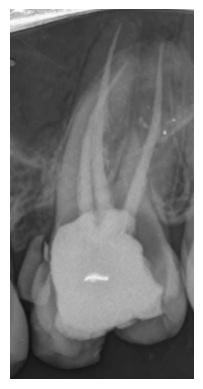

an X-ray of a tooth that has undergone root canal treatment: 0.4387
an X-ray of a tooth with a dense, continuous root canal filling: 0.3645
an X-ray of a tooth with a root canal filling extending past the root tip: 0.0851
an X-ray of a tooth with a root canal filling that ends before the root tip: 0.0718
an X-ray of a tooth with a broken metal file or instrument inside the canal: 0.0293
an X-ray of a tooth with gaps or voids in the root canal filling: 0.0106

Prediction for image: 560-24-kalani.jpg


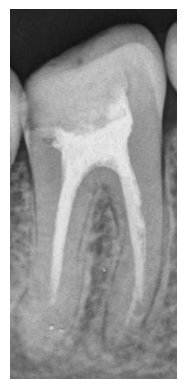

an X-ray of a tooth with gaps or voids in the root canal filling: 0.2977
an X-ray of a tooth with a dense, continuous root canal filling: 0.2901
an X-ray of a tooth that has undergone root canal treatment: 0.1955
an X-ray of a tooth with a root canal filling extending past the root tip: 0.1071
an X-ray of a tooth with a root canal filling that ends before the root tip: 0.0770
an X-ray of a tooth with a broken metal file or instrument inside the canal: 0.0326

Prediction for image: 573-priyanka.jpg


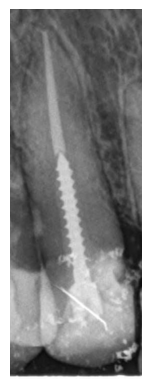

an X-ray of a tooth with gaps or voids in the root canal filling: 0.2970
an X-ray of a tooth that has undergone root canal treatment: 0.2039
an X-ray of a tooth with a dense, continuous root canal filling: 0.2018
an X-ray of a tooth with a root canal filling that ends before the root tip: 0.1246
an X-ray of a tooth with a broken metal file or instrument inside the canal: 0.0971
an X-ray of a tooth with a root canal filling extending past the root tip: 0.0756


In [1]:
import torch
from PIL import Image
from open_clip import create_model_from_pretrained, get_tokenizer
import matplotlib.pyplot as plt
import numpy as np

# ------------------------
# Load BiomedCLIP model
# ------------------------
model_name = 'hf-hub:microsoft/BiomedCLIP-PubMedBERT_256-vit_base_patch16_224'
model, preprocess = create_model_from_pretrained(model_name)
tokenizer = get_tokenizer(model_name)

# ------------------------
# Define general dental labels
# ------------------------
raw_labels = [
    "an X-ray of a tooth that has undergone root canal treatment",
    "an X-ray of a tooth with a root canal filling extending past the root tip",
    "an X-ray of a tooth with a root canal filling that ends before the root tip",
    "an X-ray of a tooth with a broken metal file or instrument inside the canal",
    "an X-ray of a tooth with a dense, continuous root canal filling",
    "an X-ray of a tooth with gaps or voids in the root canal filling"
]

templates = [
    '{}',
    # 'a radiograph showing {}',
    # 'an intraoral X-ray of {}'
]


# Create tokenized prompts
prompt_per_label = []
for label in raw_labels:
    prompt_per_label.append([template.format(label) for template in templates])

flat_prompts = [p for group in prompt_per_label for p in group]

# Tokenize all prompts
context_length = 256
tokenized_prompts = tokenizer(flat_prompts, context_length=context_length)

# ------------------------
# Load images
# ------------------------
image_paths = [
    '381-aruna.jpg',
    '560-24-kalani.jpg',
    '573-priyanka.jpg'
]

# Convert and preprocess all images
images = torch.stack([preprocess(Image.open(path).convert('RGB')) for path in image_paths])

# ------------------------
# Inference
# ------------------------
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device).eval()
images = images.to(device)
tokenized_prompts = tokenized_prompts.to(device)

with torch.no_grad():
    image_features, text_features, logit_scale = model(images, tokenized_prompts)
    logits = (logit_scale * image_features @ text_features.T).detach()

# ------------------------
# Average logits over prompt variants per label
# ------------------------
num_labels = len(raw_labels)
num_templates = len(templates)
logits = logits.reshape(len(images), num_labels, num_templates)
avg_logits = logits.mean(dim=-1)  # Average over templates
probs = avg_logits.softmax(dim=-1).cpu().numpy()

# ------------------------
# Display results
# ------------------------
for i, img_path in enumerate(image_paths):
    print(f"\nPrediction for image: {img_path}")
    plt.imshow(Image.open(img_path))
    plt.axis('off')
    plt.show()

    sorted_indices = np.argsort(probs[i])[::-1]
    for j in sorted_indices:
        print(f"{raw_labels[j]}: {probs[i][j]:.4f}")
